In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [24]:
# Cargar el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Practico Coink/Data Proyec Coink/data_limpia_coink.csv')


In [25]:
df.head()

,user_id,operation_value,operation_date,maplocation_name,user_createddate,operation_hour,user_created_hour
0,0e52d550-ae23-407a-9b1f-6e5fb1f066ab,273850,2022-01-14,CC Plaza de las Américas - Plaza Mariposa,2022-01-09,13:07:56,19:23:18
1,975ed41e-d891-4c23-aeba-06363019d8e3,900,2022-02-06,CC Plaza de las Américas - Plaza Mariposa,2022-01-10,13:11:25,15:19:29
2,f9043545-dfc2-402f-a8c7-0a61f21cb719,1800,2022-02-23,Universidad de los Andes - ML Piso 5,2021-08-25,14:01:56,12:44:48
3,979ca8ad-9600-4a1f-81e9-e70c2f55cdc5,6500,2021-12-16,CC Plaza de las Américas - Plaza Mariposa,2021-07-17,12:09:45,17:11:16
4,171db06e-2e4b-4542-a9c9-32028520fda4,150000,2022-01-25,CC Plaza de las Américas - Plaza Mariposa,2022-01-11,12:00:18,15:59:27


# Metricas

Se van a manejar diferentes metricas y con relacion a ello, se dira que tan buenos son los usuarios de COINK, basado en los datos obtenidos

### Cantidad de transacciones por usuario, total de transacciones


In [44]:
# Total operaciones
total_operations = len(df)
total_operations

4345

In [45]:
# Calcular el total de operaciones unicas
total_unique_operations = df['user_id'].nunique()
total_unique_operations

1656

In [46]:
# Calcular el número total de depósitos por usuario
num_deposits_per_user = df['user_id'].value_counts()
num_deposits_per_user.head(20)

user_id
47e76d57-09d3-4ea4-8531-9b839d83069e    61
b88c1107-1d71-4782-bcc9-285877d89b1a    44
2df8831e-a37a-4ba7-b8f0-ec7c313d68af    39
8f64a145-013a-4d76-85f5-9a0c6aaf3ee2    37
d38ae321-26b9-454b-9297-7c58068b4376    32
2e31bffe-ea66-44ec-8647-56d0fbab0516    27
6f556718-552b-4f6e-a5b2-e5f06ceb5e74    26
b99b3b89-8d45-4656-a950-c85f202897b1    25
2b9d276a-54e5-4837-ab8d-cd7ec0e89ea5    23
c82a388c-b06b-4bd4-882c-faa5d776d325    23
970cb0ff-1243-4066-8eae-22174f1a5e1d    22
ebf015f5-75a6-4273-a7e3-48e9f95d9f62    21
6fa8953f-3822-4976-afc5-97ad25cbcd33    20
44435a85-4d17-4a04-ab09-42da78d9ba88    20
0c85e0ef-1ebe-4cf6-a186-736c710399e8    20
69cbf644-dc5b-488f-8761-697182345d12    19
b2f16fd3-03c9-4d2f-8c5f-7878292fa4fe    19
33b0dc63-88df-4c53-8434-772409b38f55    18
5c6df957-7f03-4cb5-bf06-105806324a9e    18
f86064c6-86d0-41ec-9262-d227de89e0ee    17
Name: count, dtype: int64

In [47]:
# media de transacciones por usuario
df['user_id'].value_counts().mean()

2.623792270531401

In [48]:
# Contar la cantidad de transacciones por usuario
transactions_per_user = df['user_id'].value_counts()

# Contar la cantidad de usuarios con 9 o más transacciones
users_with_3_or_more = transactions_per_user[transactions_per_user >= 3].index
users_with_3_or_more


Index(['47e76d57-09d3-4ea4-8531-9b839d83069e',
       'b88c1107-1d71-4782-bcc9-285877d89b1a',
       '2df8831e-a37a-4ba7-b8f0-ec7c313d68af',
       '8f64a145-013a-4d76-85f5-9a0c6aaf3ee2',
       'd38ae321-26b9-454b-9297-7c58068b4376',
       '2e31bffe-ea66-44ec-8647-56d0fbab0516',
       '6f556718-552b-4f6e-a5b2-e5f06ceb5e74',
       'b99b3b89-8d45-4656-a950-c85f202897b1',
       '2b9d276a-54e5-4837-ab8d-cd7ec0e89ea5',
       'c82a388c-b06b-4bd4-882c-faa5d776d325',
       ...
       '224655b3-d3c8-4964-a317-dd138929ad6e',
       'de8ccdf9-8921-44ce-b698-cd26c181e49c',
       '78039346-1b00-4ebf-8e04-01b4a39b24b5',
       '1df3064b-8b74-48ad-b580-8a342b68d559',
       'afb38040-579b-42b5-9c58-a3544521b55d',
       '116b91d7-f7bd-4998-b770-f3d40fcaa005',
       'bf8f1f04-4a17-4437-8eec-2138ef14049b',
       '8227b72b-47ff-4c71-acb9-09b37ce2019a',
       'b92e89e3-1c94-4443-9c94-ba8dedb3767a',
       '6ff4b760-66bc-47bd-9d7d-67dc26ea66c9'],
      dtype='object', name='user_id', length=450

In [49]:
# Contar la cantidad de usuarios con 8 o menos transacciones
users_with_2_or_less = transactions_per_user[transactions_per_user <= 2].index
users_with_2_or_less

Index(['8762c286-cc59-4cfc-af6c-cb2fa9b92efa',
       '60bb185b-31eb-4d23-9634-2351860ed586',
       'f7c3f3a2-0640-4caf-97b2-7d657ffe8147',
       'f238023d-e6c6-4a7f-be38-c7232eb2037a',
       '0a8bbb74-a276-4434-895c-b30a94c04dee',
       '5985d16a-7688-493c-bb9d-f60ed43870ab',
       'bf5c2ec0-855a-431c-81d8-761b610a27a9',
       'ab7be901-0612-456c-b8d3-470c67839f48',
       '1bbb3099-c483-416b-b83f-fc6a42a5d61a',
       '158389e7-4fa8-497f-b826-7d3a7ad0ffd4',
       ...
       'e90ce536-fd4a-42e3-9e54-eb1eefb34472',
       '2f538cb1-3a04-4c3f-acdc-2afef58209db',
       '4df4bedd-15cf-4e3e-a176-602e71cfd311',
       '9eca2241-2d6d-490c-9789-0058e837fa9f',
       'ad826f40-96d0-4808-b14a-fcbc1cc89293',
       '477e444f-9d89-47ae-8d7e-80455ce71fbe',
       '198d85e8-2f40-4b5f-b7a8-310408de841a',
       '7e076300-485b-460f-a99c-3033d12e2916',
       '2196beee-e3a1-424c-869c-8517a40a6443',
       'c3d37131-76e8-4c4f-8e55-2778ab8817ad'],
      dtype='object', name='user_id', length=120

In [50]:
# Calcular la suma de las cantidades depositadas por usuarios con 3 o más transacciones
sum_users_with_3_or_more = df[df['user_id'].isin(users_with_3_or_more)]['operation_value'].sum()
sum_users_with_3_or_more


93384400

In [51]:
# Calcular la suma de las cantidades depositadas por usuarios con 2 o menos transacciones
sum_users_with_2_or_less = df[df['user_id'].isin(users_with_2_or_less)]['operation_value'].sum()
sum_users_with_2_or_less

57032350

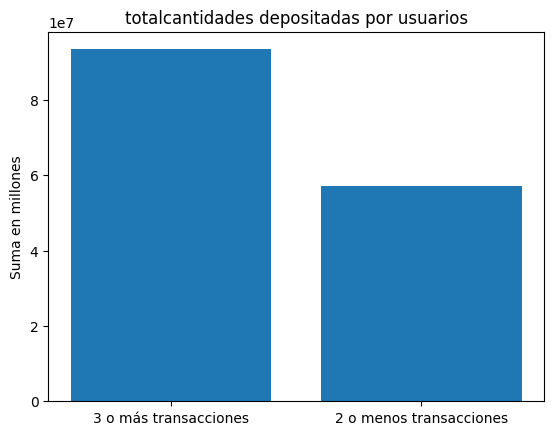

In [52]:
# Crear el gráfico de barras
fig, ax = plt.subplots()
users = ['3 o más transacciones', '2 o menos transacciones']
sums = [sum_users_with_3_or_more, sum_users_with_2_or_less]

ax.bar(users, sums)
ax.set_ylabel('Suma en millones')
ax.set_title('totalcantidades depositadas por usuarios')
plt.show()

### frecuencia de depositos


In [60]:
# Convertir la columna 'operation_date' a tipo datetime
df['operation_date'] = pd.to_datetime(df['operation_date'])

# Filtrar las transacciones de depósito para el año 2021
deposits_2021 = df[(df['operation_value'] > 0) & (df['operation_date'].dt.year == 2021)]

# Agrupar por mes y contar la cantidad de depósitos en cada mes
deposits_by_month = deposits_2021.groupby(deposits_2021['operation_date'].dt.month).size()

print("Depósitos por mes en el año 2021:")
deposits_by_month


Depósitos por mes en el año 2021:


operation_date
11     212
12    1265
dtype: int64

In [61]:
# Convertir la columna 'operation_date' a tipo datetime
df['operation_date'] = pd.to_datetime(df['operation_date'])

# Filtrar las transacciones de depósito para el año 2022
deposits_2022 = df[(df['operation_value'] > 0) & (df['operation_date'].dt.year == 2022)]

# Agrupar por mes y contar la cantidad de depósitos en cada mes
deposits_by_month = deposits_2022.groupby(deposits_2022['operation_date'].dt.month).size()

print("Depósitos por mes en el año 2022:")
deposits_by_month



Depósitos por mes en el año 2022:


operation_date
1    1422
2    1446
dtype: int64

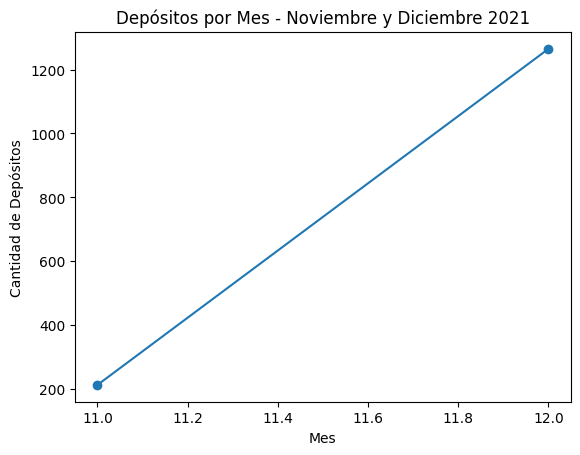

In [67]:

# Filtrar las transacciones de depósito para los meses de noviembre y diciembre de 2021
months_filter = (df['operation_date'].dt.year == 2021) & (df['operation_date'].dt.month.isin([11, 12]))

deposits_filtered = df[(df['operation_value'] > 0) & months_filter]

# Agrupar por mes y contar la cantidad de depósitos en cada mes
deposits_by_month = deposits_filtered.groupby(deposits_filtered['operation_date'].dt.month).size()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los depósitos por mes
ax.plot(deposits_by_month.index, deposits_by_month.values, marker='o')

#Titulo
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Depósitos')
ax.set_title('Depósitos por Mes - Noviembre y Diciembre 2021')


plt.show()

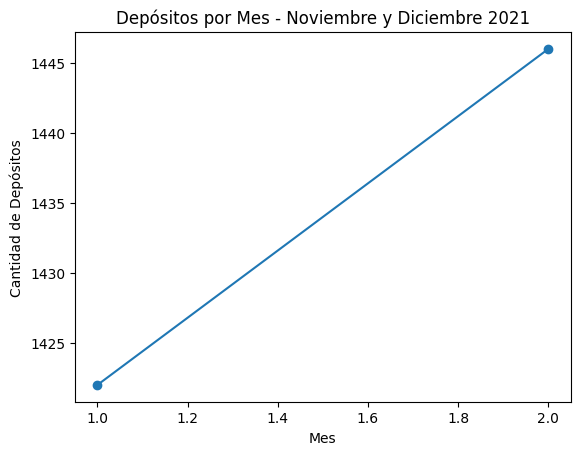

In [68]:

# Filtrar las transacciones de depósito para los meses de noviembre y diciembre de 2021
months_filter = (df['operation_date'].dt.year == 2022) & (df['operation_date'].dt.month.isin([1, 2]))

deposits_filtered = df[(df['operation_value'] > 0) & months_filter]

# Agrupar por mes y contar la cantidad de depósitos en cada mes
deposits_by_month = deposits_filtered.groupby(deposits_filtered['operation_date'].dt.month).size()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los depósitos por mes
ax.plot(deposits_by_month.index, deposits_by_month.values, marker='o')

# Agregar título
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Depósitos')
ax.set_title('Depósitos por Mes - Noviembre y Diciembre 2021')

# Mostrar la gráfica
plt.show()

### Cantidad de operacion por ubicacion

In [71]:
# Calcular la cantidad de operaciones por ubicación
Operations_by_location = df.groupby('maplocation_name').size().reset_index(name='cantidad_operaciones')
Operations_by_location

,maplocation_name,cantidad_operaciones
0,CC Los Molinos - Zona Montaña Nivel 2,1894
1,CC Plaza de las Américas - Plaza Mariposa,1976
2,Universidad de los Andes - ML Piso 5,475


In [93]:
# Calcular el valor total en operation_value por ubicación
total_value_by_location = df.groupby('maplocation_name')['operation_value'].sum().reset_index(name='valor_total')

print(total_value_by_location)

                             maplocation_name  valor_total
0       CC Los Molinos - Zona Montaña Nivel 2     34597650
1  CC Plaza de las Américas  - Plaza Mariposa    112241000
2        Universidad de los Andes - ML Piso 5      3578100


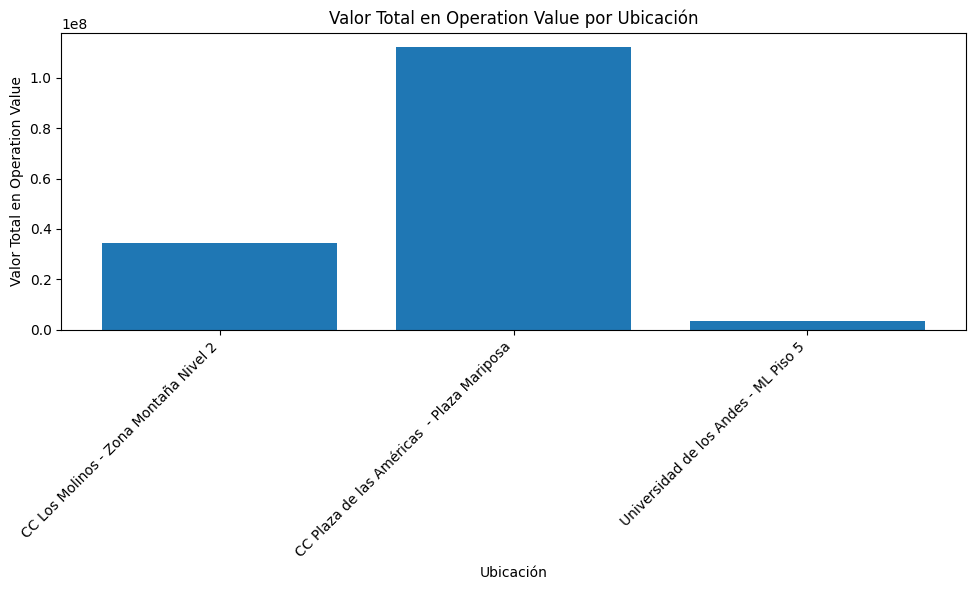

In [94]:

# Calcular el valor total en operation_value por ubicación
total_value_by_location = df.groupby('maplocation_name')['operation_value'].sum().reset_index(name='valor_total')

# Graficar el valor total por ubicación
plt.figure(figsize=(10, 6))
plt.bar(total_value_by_location['maplocation_name'], total_value_by_location['valor_total'])
plt.xlabel('Ubicación')
plt.ylabel('Valor Total en Operation Value')
plt.title('Valor Total en Operation Value por Ubicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Horas de operacion

In [84]:

# Convertir la columna 'operation_hour' en formato datetime para facilitar los cálculos
df['operation_hour'] = pd.to_datetime(df['operation_hour'], format='%H:%M:%S').dt.hour

# Calcular la suma total de horas de operación y el número total de operaciones
sum_hours = df['operation_hour'].sum()
total_operations = df['operation_hour'].count()

# Calcular el promedio de horas de operación
average_hour = sum_hours / total_operations

print(f"El promedio de horas de operación es: {average_hour}")

El promedio de horas de operación es: 14.405293440736479


In [89]:

# Agrupar por hora y contar el número de operaciones en cada hora
hourly_operations = df.groupby('operation_hour').size().reset_index(name='count')

# Ordenar los resultados de mayor a menor cantidad de operaciones
hourly_operations_sorted = hourly_operations.sort_values(by='count', ascending=False)

# Mostrar las horas con mayor operación
top_hours = hourly_operations_sorted.head(5)  # Cambia el número si quieres más horas
print("Horas con mayor operación:")
print(top_hours)

Horas con mayor operación:
    operation_hour  count
13              17    481
12              16    412
11              15    404
10              14    399
9               13    383


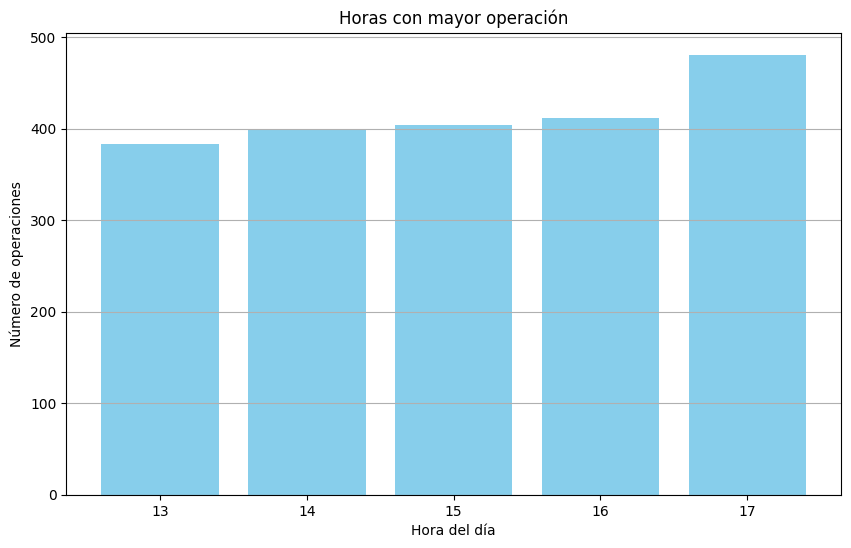

In [86]:

# Gráfico de barras de las horas con mayor operación
plt.figure(figsize=(10, 6))
plt.bar(top_hours['operation_hour'], top_hours['count'], color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Número de operaciones')
plt.title('Horas con mayor operación')
plt.xticks(top_hours['operation_hour'])
plt.grid(axis='y')
plt.show()

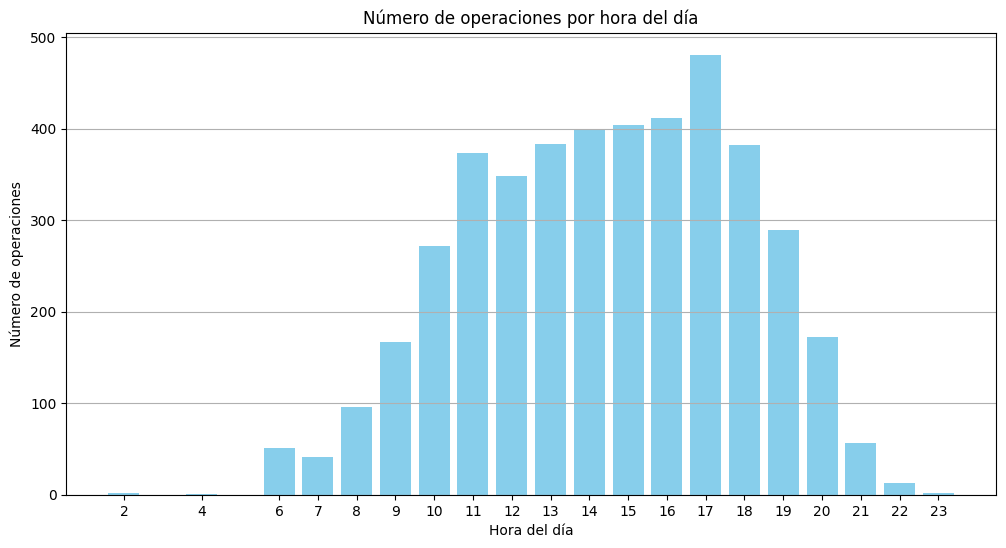

Número de operaciones por hora del día:
    operation_hour  count
13              17    481
12              16    412
11              15    404
10              14    399
9               13    383
14              18    382
7               11    374
8               12    348
15              19    289
6               10    272
16              20    172
5                9    167
4                8     96
17              21     56
2                6     51
3                7     41
18              22     13
0                2      2
19              23      2
1                4      1


In [90]:

# Crear la gráfica de barras de todas las horas
plt.figure(figsize=(12, 6))
plt.bar(hourly_operations_sorted['operation_hour'], hourly_operations_sorted['count'], color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Número de operaciones')
plt.title('Número de operaciones por hora del día')
plt.xticks(hourly_operations_sorted['operation_hour'])
plt.grid(axis='y')
plt.show()

# Imprimir la tabla de todas las horas
print("Número de operaciones por hora del día:")
hourly_operations_sorted

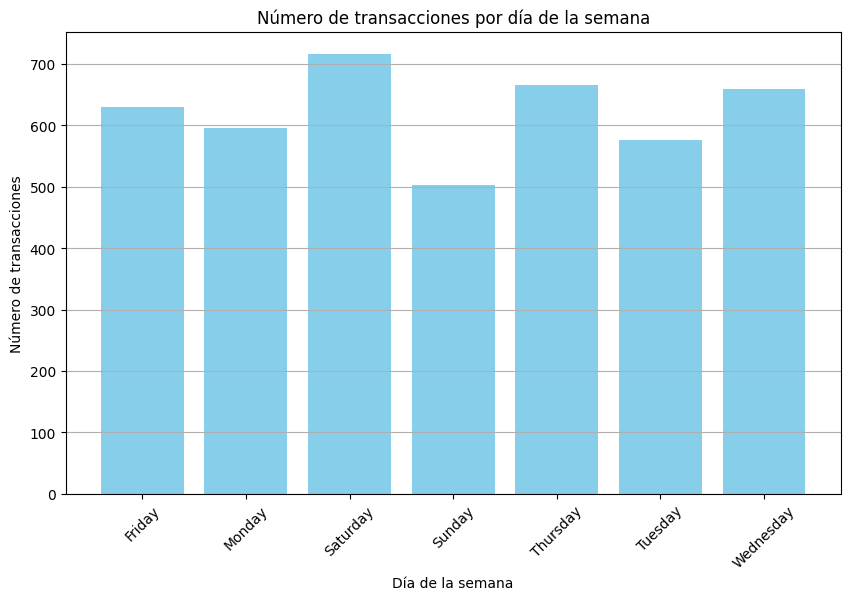

Número de transacciones por día de la semana:


,day_of_week,count
0,Friday,630
1,Monday,595
2,Saturday,716
3,Sunday,503
4,Thursday,666
5,Tuesday,576
6,Wednesday,659


In [95]:

# Convertir la columna 'operation_date' en formato datetime y obtener el día de la semana
df['operation_date'] = pd.to_datetime(df['operation_date'])
df['day_of_week'] = df['operation_date'].dt.day_name()

# Agrupar por día de la semana y contar el número de transacciones en cada día
daily_transactions = df.groupby('day_of_week').size().reset_index(name='count')

# Ordenar los resultados por día de la semana
daily_transactions_sorted = daily_transactions.sort_values(by='day_of_week', key=lambda x: pd.Categorical(x, categories=
['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']), ignore_index=True)

# Crear la gráfica de barras del número de transacciones por día de la semana
plt.figure(figsize=(10, 6))
plt.bar(daily_transactions_sorted['day_of_week'], daily_transactions_sorted['count'], color='skyblue')
plt.xlabel('Día de la semana')
plt.ylabel('Número de transacciones')
plt.title('Número de transacciones por día de la semana')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Imprimir la tabla del número de transacciones por día de la semana
print("Número de transacciones por día de la semana:")
daily_transactions_sorted